Before this script can be executed, one needs to download the original images of the datased from the Broad Bioimage Benchmark Collection:

https://data.broadinstitute.org/bbbc/BBBC010/

Please Download into: /Data/C_Elegans/Original/

For more information, please see /Data/C_Elegans/README.txt

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import os
import colorsys
import imageio as io

from skimage.filters import threshold_otsu

In [2]:
data_path = '../Data/C_Elegans/Original/'

In [3]:
file_list = []
i         = 0
for element in os.listdir(data_path):
    if element[-4:] == ".tif" and '_w2_' in element:
        
        img          = io.imread(data_path+element)
        xx,yy        = np.meshgrid(np.arange(np.shape(img)[1]),np.arange(np.shape(img)[0]))
        boolz        = img>threshold_otsu(img)
        xmin,xmax    = np.min(xx[boolz]),np.max(xx[boolz])
        ymin,ymax    = np.min(yy[boolz]),np.max(yy[boolz])
        
        centered_img = (img[ymin-10:ymin+420,xmin-10:xmin+420]/float(np.max(img))*255).astype(np.uint8)
        
        io.imsave(data_path+str(i).zfill(4)+'.png',centered_img)
        
        i += 1

In [4]:
if i != 97:
    raise Exception('Wrong length of data. Please make sure you are using the correct dataset.')

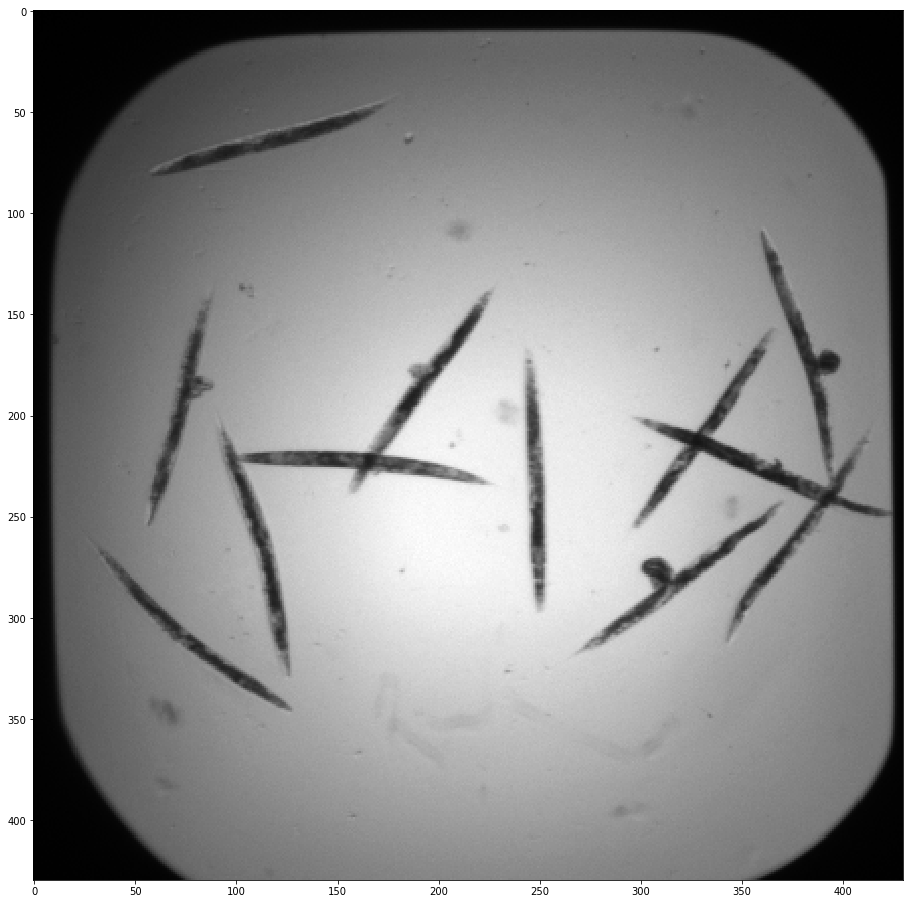

In [5]:
plt.figure(figsize=(16,16))
plt.imshow(centered_img,cmap='gray')
plt.show()